<a href="https://colab.research.google.com/github/ducanhho2296/analyzing-Osmnx-Geopandas/blob/main/Pandas_dataframe_Openstreetmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install geopandas
!pip install osmnx
!pip install contextily

: 

In [ ]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
# import contextily as cx
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain


/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Definitions

In [ ]:
food_tags = ["restaurant",
        "fast_food",
        "food_court",
        "ice_cream",
        "bakery",
        "cafe",
        "bar",
        "pub",
        "biergarten"]

school_tags = ["kindergarten",
          "driving_school",
          "language_school",
          "college",
          "music_school",
          "university",
          "library",
          "toy_library",
          "school"]
 
healthcare_tags = ["clinic",
              "dentist",
              "doctors",
              "pharmacy",
              "baby_hatch",
              "hospital",
              "nursing_home",
              "social_facility",
              "veterinary"]

entertainment_tags = ["arts_centre",
                 "brothel",
                 "casino",
                 "cinema",
                 "community_centre",
                 "conference_centre",
                 "events_venue",
                 "fountain",
                 "gambling",
                 "love_hotel",
                 "nightclub",
                 "planetarium",
                 "public_bookcase",
                 "social_centre",
                 "stripclub",
                 "studio",
                 "swingerclub",
                 "theatre"]

public_tags = ["courthouse",
          "police",
          "post_office",
          "fire_station",
          "post_depot",
          "prison",
          "ranger_station",
          "townhall",
          "post_box"]

roads = ["motorwoy",
        "trunk",
        "primary",
        "secondary",
        "tertiary",
        "unclassified",
        "residential",
        "motorway_link",
        "trunk_link",
        "primary_link",
        "secondary_link",
        "tertiary_link",
        "living_street",
        "service",
        "pedestrian",
        "track",
        "bus_guideway",
        "escape",
        "raceway",
        "road",
        "busway",
        "footway",
        "bridleway",
        "steps",
        "corridor",
        "path",
        "cycleway"]

In [ ]:
%%capture
city = "Hannover Mitte"

# buildings = ox.geometries_from_place(query=city, tags={'building':True})

food = ox.geometries_from_place(query=city, tags={"amenity": food_tags})
school = ox.geometries_from_place(query=city, tags={"amenity": school_tags})
healthcare = ox.geometries_from_place(query=city, tags={"amenity": healthcare_tags})
entertainment = ox.geometries_from_place(query=city, tags={"amenity": entertainment_tags})
public = ox.geometries_from_place(query=city, tags={"amenity": public_tags})

retail = ox.geometries_from_place(query=city, tags={"shop": True})
sport = ox.geometries_from_place(query=city, tags={"sport": True})
leisure = ox.geometries_from_place(query=city, tags={'leisure':True})
highway = ox.geometries_from_place(query=city, tags={'highway':roads})

In [ ]:
point_amenities = pd.concat([retail,food,school,healthcare,entertainment,public], keys=["retail","food","school","healthcare","entertainment","public"])

In [ ]:
point_amenities.reset_index(inplace=True)

<ipython-input-6-fad081ba57be>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  point_amenities.reset_index(inplace=True)
<ipython-input-6-fad081ba57be>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  point_amenities.reset_index(inplace=True)
<ipython-input-6-fad081ba57be>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newf

In [ ]:
point_amenities.rename(columns={'level_0':'function'},inplace=True)

In [ ]:
# buildings = buildings.sjoin(point_amenities, how="left")
buildings = point_amenities

In [ ]:
buildings.drop_duplicates(subset='geometry',keep = 'last',inplace=True)

In [ ]:
buildings.head()

,function,element_type,osmid,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street,amenity,brand,...,check_date:collection_times,last_checked,postal_code,post_box:type,name:lt,addr:suburb,post_office:type,operator:short,building:architecture,year_of_construction
0,retail,node,60656160,Hannover,DE,11,30159,Leinstraße,fuel,Agip,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,retail,node,84456835,NaN,NaN,NaN,NaN,NaN,NaN,PENNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,retail,node,87000497,Hannover,DE,5,30161,Rundestraße,NaN,Kaufland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,retail,node,91483227,NaN,NaN,NaN,NaN,NaN,NaN,Aldi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,retail,node,94548668,Hannover,DE,43,30171,Marienstraße,NaN,Rossmann,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot

####Plotting

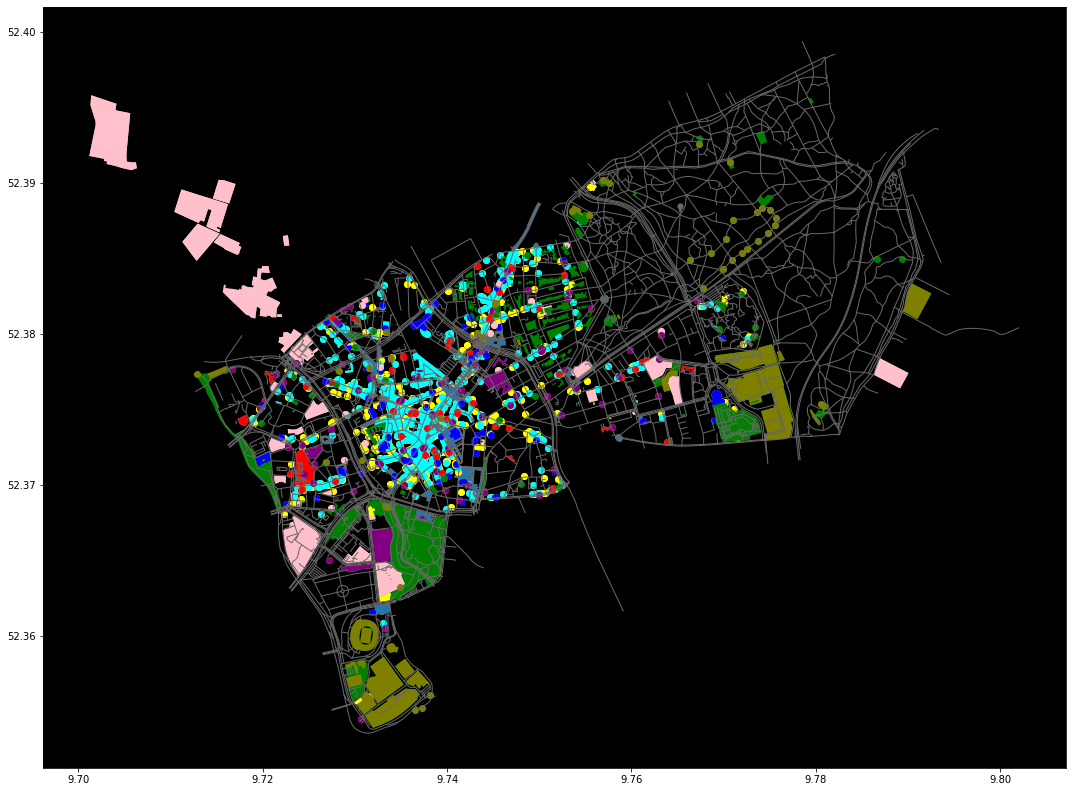

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_facecolor((0.0, 0.0, 0.0))

highway.plot(ax=ax, linewidth=1, edgecolor='dimgray')
buildings.plot(ax=ax, facecolor='silver')
buildings[buildings.function == "food"].plot(ax=ax,color='yellow')
buildings[buildings.function == "retail"].plot(ax=ax,color='cyan')
buildings[buildings.function == "healthcare"].plot(ax=ax,color='red')
buildings[buildings.function == "entertainment"].plot(ax=ax,color='blue')
buildings[buildings.function == "school"].plot(ax=ax,color='pink')
buildings[buildings.function == "public"].plot(ax=ax,color='purple')
leisure.plot(ax=ax,color='green')
sport.plot(ax=ax,color='olive')
plt.tight_layout()

###Create Center point of each region

####Get coordinates of polygon 

In [ ]:
# buildings[buildings.function == "food"]

####Create Raster 40x40

In [ ]:
#select a seed point as center_point, create raster with this center_point 
#and mapping all amenities inside raster from original (long-latitude) into the new raster-axis.

#-----my idea that we take randomly from each amenity in map a seed point and create
# a raster with radius 250m around this seed point and do the mapping as labeling.

#------------------------------------------------------------------------------# 
def create_raster(center_point, center_dist=250):  #random select center_point
  bbox = ox.utils_geo.bbox_from_point(center_point, dist=center_dist)
  north = bbox[0] #max longtitude
  south = bbox[1] 
  east = bbox[2]  #max lattitude
  west = bbox[3]
  #create line of raster 40x40
  step_long = (north - south) / 40
  step_latt = (east - west) / 40
  return north, south, east, west, step_long, step_latt

#extract points from a polygon into a list
def get_points(polygon):
  all_coords = []
  if polygon.type == "Point":
    points = list(polygon.coords[0])
    points_plotting = points

  #check if polygon contains interiors component
  elif polygon.type != "Point" and list(polygon.interiors) != []:  #contains interiors
    for i in polygon.boundary:
      coords = np.dstack(i.coords.xy).tolist()
      all_coords.append(*coords)
    #extract nested list into a list of points    
    points = list(chain.from_iterable(all_coords)) #point = (longtitude, latitude)
    points_plotting = points[1]
  elif polygon.type != "Point" and list(polygon.interiors) == []: 
    points = list(polygon.exterior.coords)
    points_plotting = list(points[1])
  return points, points_plotting 
  # return points 

#----mapping coordinates of polygon from original axis into new raster axis 40x40----- 
#mapping each amenity to another axis
def mapping(amenity, center_point): 
  points_mapping = []  #coordinates after mapping into Raster
  if amenity.type == 'Polygon':
    #extract points of polygon
    points, pt = get_points(amenity) 
    #choose the first point of this amenity as the seed point to create raster
    # center_point = (points[0][1], points[0][0])   #center_point = (latitude, longtitude)

    for point in points:    
      n, s, e, w, s1, s2 = create_raster(center_point) #create raster
      #mapping coordinates 
      latt_mapping = (point[0] - w) * (40 - 0) / (e - w) + 0
      long_mapping = (point[1] - s) * (40 - 0) / (n - s) + 0
      points_mapping.append((round(long_mapping), round(latt_mapping)))

  elif amenity.type == 'Point':
    points = get_points(amenity) 
    n, s, e, w, s1, s2 = create_raster(center_point) #create raster
    #mapping coordinates 
    latt_mapping = (points[0] - w) * (40 - 0) / (e - w) + 0
    long_mapping = (points[1] - s) * (40 - 0) / (n - s) + 0
    points_mapping.append((round(long_mapping), round(latt_mapping)))
  return points_mapping



In [ ]:
# amenity = buildings[buildings.function == "food"].geometry[32]

In [ ]:
# mapping(amenity)

##Creating & Plotting random center_points

####create random points

In [ ]:
#Explode multi-part geometries into multiple single geometries
exploded = buildings.explode(index_parts=True)
exploded.shape

(1693, 282)

In [ ]:
buildings.shape

(1683, 282)

In [ ]:
list(exploded.geometry[0].coords[0])

AttributeError: ignored

In [ ]:
point_list = []
for i in exploded.geometry:
  polygon, points = get_points(i)
  point_list.append(points)

len(point_list)

<ipython-input-13-7f118de11598>:28: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for i in polygon.boundary:


1693

In [ ]:
import random

center_points = random.sample(point_list, 1000)
center_points[0]

[9.7350245, 52.3748321]

###plotting center_points
get long-latitudes

In [ ]:
rand_longs = list(list(zip(*center_points))[0])
rand_lats = list(list(zip(*center_points))[1])

create DataFrame of center_points

In [ ]:
point_frame = pd.DataFrame(
    {
     'Latitude': rand_lats,
     'Longitude': rand_longs})
df_points = gpd.GeoDataFrame(
    point_frame, geometry=gpd.points_from_xy(point_frame.Longitude, point_frame.Latitude))

In [ ]:
df_points.head()

,Latitude,Longitude,geometry
0,52.374832,9.735024,POINT (9.73502 52.37483)
1,52.370897,9.735843,POINT (9.73584 52.37090)
2,52.383572,9.745918,POINT (9.74592 52.38357)
3,52.384381,9.746473,POINT (9.74647 52.38438)
4,52.374480,9.737532,POINT (9.73753 52.37448)


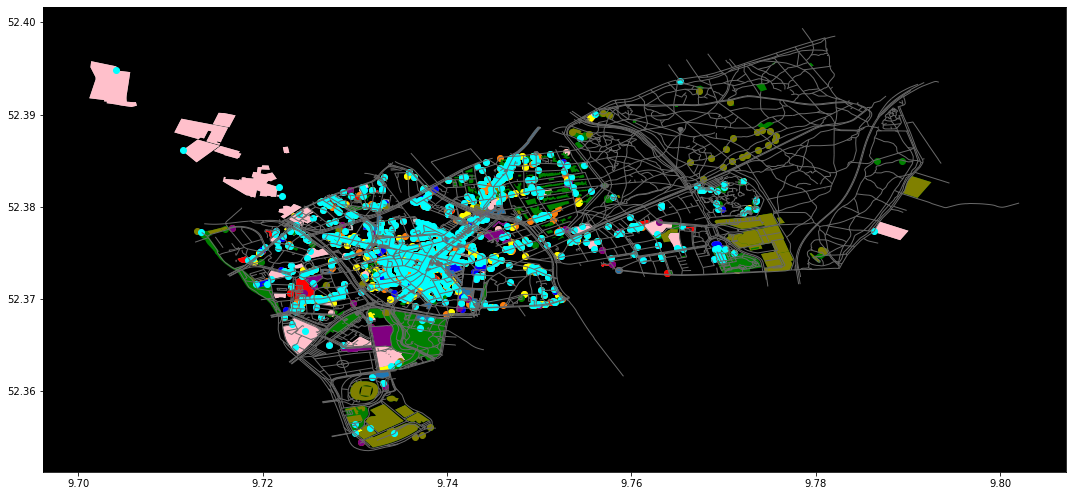

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_facecolor((0.0, 0.0, 0.0))

highway.plot(ax=ax, linewidth=1, edgecolor='dimgray')
buildings.plot(ax=ax, facecolor='silver')
buildings[buildings.function == "food"].plot(ax=ax,color='yellow')
# buildings[buildings.function == "retail"].plot(ax=ax,color='cyan')
buildings[buildings.function == "healthcare"].plot(ax=ax,color='red')
buildings[buildings.function == "entertainment"].plot(ax=ax,color='blue')
buildings[buildings.function == "school"].plot(ax=ax,color='pink')
buildings[buildings.function == "public"].plot(ax=ax,color='purple')
leisure.plot(ax=ax,color='green')
sport.plot(ax=ax,color='olive')
df_points.plot(ax=ax, color='cyan')

plt.tight_layout()

#Plotting and saving map of a region inside bbox

###Create a `buildings_inbbox` dataframe to store all rows of `buildings`, which have Polygon inside the BBox

In [ ]:
# from shapely.geometry import Polygon

# polygon = Polygon([(bbox[3],bbox[1]), (bbox[2], bbox[1]),(bbox[2], bbox[0]), (bbox[3], bbox[0])])

In [ ]:
!mkdir figures

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

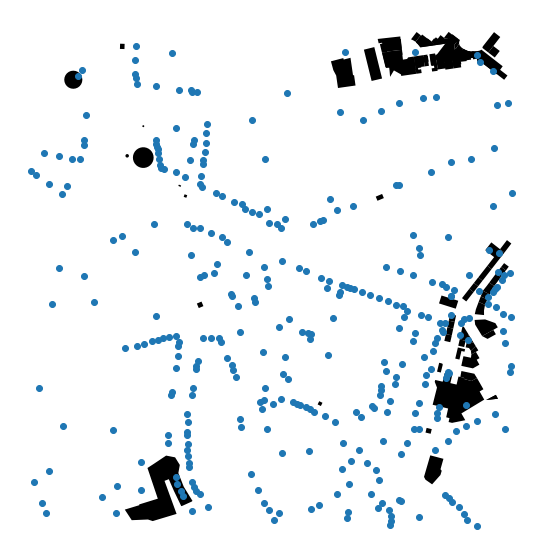

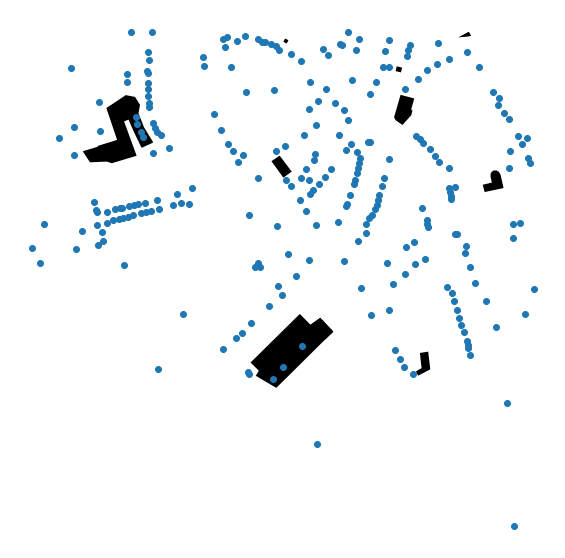

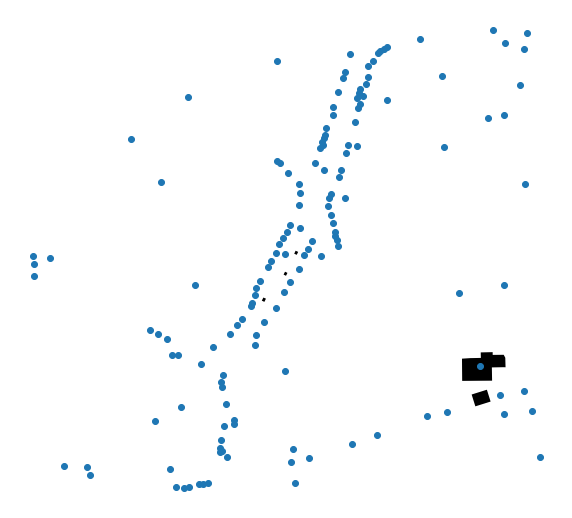

In [ ]:
from shapely.geometry import Polygon

for i in range (0, 3):
  rand_point = (center_points[i][1],center_points[i][0])
  bbox = ox.utils_geo.bbox_from_point(rand_point, dist=300)

  bbox_polygon = Polygon([(bbox[3],bbox[1]), (bbox[2], bbox[1]),(bbox[2], bbox[0]), (bbox[3], bbox[0])])
  #checking if polygons inside the bbox
  check_polygon = exploded.geometry.within(bbox_polygon)

  #return all rows, which have polygons inside bbox
  polygon_inbbox = check_polygon[check_polygon.values == True]

  #using isin() to extract subtable contains only polygon_inbbox.index
  indexs = polygon_inbbox.index
  condition = exploded['geometry'].index.isin(indexs)
  buildings_inbbox = exploded[condition]

  #mapping amenities inside bbox into the new axis

  maps = [] #mapping coords of each amenity into variable maps 
  geo = buildings_inbbox['geometry']
  for j in geo.index:
    map = mapping(geo[j], rand_point)
    maps.append(map)

  buildings_inbbox["mapping_geo"] = maps #create new mapping column
  #plotting time
  fig, ax = plt.subplots(figsize=(10,10))
  ax.set_facecolor((0.0, 0.0, 0.0))
  plt.axis('off')
  buildings_inbbox.plot(ax=ax, facecolor='black')
  buildings_inbbox.to_csv('/content/figures/label {}.csv'.format(i))
  plt.savefig('/content/figures/figure {}.jpg'.format(i), format="jpg", bbox_inches='tight')

In [ ]:
!pwd

/content


In [ ]:
buildings_inbbox.to_csv("/content/demo.csv", index=False)

In [ ]:
check_polygon = exploded.geometry.within(polygon)
polygon_inbbox = check_polygon[check_polygon.values == True]
polygon_inbbox.shape

In [ ]:
demo = buildings_inbbox

In [ ]:
demo1 = demo["geometry"]
demo1.index[3][0]

19

In [ ]:
demo.shape

(152, 282)

In [ ]:
rand_point = (center_points[1][1],center_points[1][0])
maps = []
for i in demo1.index:
  map = mapping(demo1[i], rand_point)
  maps.append(map)
maps  

[[(119, 69)],
 [(126, 72)],
 [(116, 94)],
 [(136, 76)],
 [(138, 79)],
 [(137, 63)],
 [(117, 94)],
 [(149, 94)],
 [(142, 93)],
 [(111, 54)],
 [(150, 96)],
 [(148, 80)],
 [(148, 74)],
 [(113, 68)],
 [(123, 62)],
 [(115, 63)],
 [(121, 64)],
 [(118, 69)],
 [(117, 69)],
 [(113, 68)],
 [(115, 69)],
 [(118, 69)],
 [(112, 69)],
 [(127, 72)],
 [(126, 71)],
 [(125, 71)],
 [(124, 70)],
 [(124, 70)],
 [(147, 82)],
 [(148, 83)],
 [(146, 79)],
 [(143, 79)],
 [(138, 77)],
 [(143, 79)],
 [(141, 78)],
 [(140, 78)],
 [(140, 77)],
 [(134, 78)],
 [(136, 76)],
 [(131, 77)],
 [(129, 76)],
 [(131, 76)],
 [(124, 72)],
 [(135, 76)],
 [(133, 75)],
 [(130, 73)],
 [(132, 74)],
 [(138, 74)],
 [(137, 75)],
 [(131, 74)],
 [(143, 81)],
 [(145, 81)],
 [(145, 81)],
 [(148, 82)],
 [(116, 89)],
 [(149, 96)],
 [(146, 89)],
 [(109, 66)],
 [(139, 74)],
 [(146, 82)],
 [(136, 78)],
 [(123, 69)],
 [(130, 53)],
 [(129, 52)],
 [(130, 51)],
 [(136, 96)],
 [(112, 76)],
 [(109, 64)],
 [(111, 75)],
 [(133, 79)],
 [(132, 79)],
 [(142

In [ ]:
b = 80
a = np.zeros(shape=(b,b))
for i in range(b):
    a[0][i] = i+1
    a[i][0] = i+1

In [ ]:
d = pd.DataFrame(a)
d

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
!zip -r figures.zip /content/figures

In [ ]:
import pandas as pd
import torch
import random

# creating dummy targets (float values)
targets_data = [random.random() for i in range(10)]

# creating DataFrame from targets_data
targets_df = pd.DataFrame(data=targets_data)
targets_df.columns = ['targets']

# creating tensor from targets_df 
torch_tensor = torch.tensor(targets_df['targets'].values)

# printing out result
print(torch_tensor)